In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv('segmentation data.csv')
display(df.head(5))
print(df.info())
print(df.describe())
print(df.columns)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None
                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     

In [63]:
display(df.isnull().sum())
display(df.nunique)
display(df.duplicated().sum())
df.shape

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

<bound method DataFrame.nunique of              ID  Sex  Marital status  Age  Education  Income  Occupation  \
0     100000001    0               0   67          2  124670           1   
1     100000002    1               1   22          1  150773           1   
2     100000003    0               0   49          1   89210           0   
3     100000004    0               0   45          1  171565           1   
4     100000005    0               0   53          1  149031           1   
...         ...  ...             ...  ...        ...     ...         ...   
1995  100001996    1               0   47          1  123525           0   
1996  100001997    1               1   27          1  117744           1   
1997  100001998    0               0   31          0   86400           0   
1998  100001999    1               1   24          1   97968           0   
1999  100002000    0               0   25          0   68416           0   

      Settlement size  
0                   2  
1   

np.int64(0)

(2000, 8)

In [64]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


None

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [65]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    print(f"{col}: Skewness = {df[col].skew():.2f}")

ID: Skewness = 0.00
Sex: Skewness = 0.17
Marital status: Skewness = 0.01
Age: Skewness = 1.01
Education: Skewness = 0.49
Income: Skewness = 1.20
Occupation: Skewness = 0.19
Settlement size: Skewness = 0.51


In [66]:
from sklearn.preprocessing import PowerTransformer

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

skewed_cols = [col for col in num_cols if abs(df[col].skew()) > 0.5]

pt = PowerTransformer(method='yeo-johnson')
df[skewed_cols] = pt.fit_transform(df[skewed_cols])

for col in skewed_cols:
    print(f"{col}: Skewness (after Yeo-Johnson) = {df[col].skew():.2f}")

Age: Skewness (after Yeo-Johnson) = 0.06
Income: Skewness (after Yeo-Johnson) = 0.01
Settlement size: Skewness (after Yeo-Johnson) = 0.16


In [67]:
for col in num_cols:
    df[col] = df[col].astype(float)  
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    before_outliers = ((df[col] < lower) | (df[col] > upper)).sum()

    df.loc[df[col] < lower, col] = lower
    df.loc[df[col] > upper, col] = upper
    print(f"{col}:= {before_outliers}")

ID:= 0
Sex:= 0
Marital status:= 0
Age:= 0
Education:= 614
Income:= 59
Occupation:= 0
Settlement size:= 0


In [68]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df.loc[df[col] < lower, col] = lower
    df.loc[df[col] > upper, col] = upper

    after_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: Outliers after rectification = {after_outliers}")

ID: Outliers after rectification = 0
Sex: Outliers after rectification = 0
Marital status: Outliers after rectification = 0
Age: Outliers after rectification = 0
Education: Outliers after rectification = 0
Income: Outliers after rectification = 0
Occupation: Outliers after rectification = 0
Settlement size: Outliers after rectification = 0


In [69]:
variance = df.var()

print("Variance of each column:\n")
print(variance)

Variance of each column:

ID                 333500.000000
Sex                     0.248275
Marital status          0.250113
Age                     1.000500
Education               0.000000
Income                  0.912468
Occupation              0.407794
Settlement size         1.000500
dtype: float64


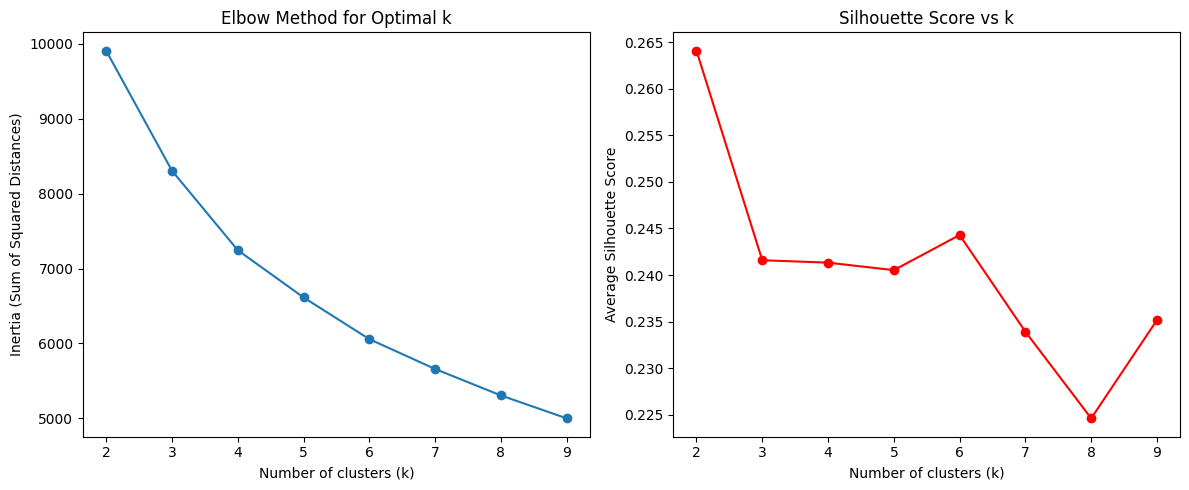

Best k (highest Silhouette Score): 2


In [70]:
inertia = []           
sil_scores = []       
range_n_clusters = range(2, 10)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_) 
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(list(range_n_clusters), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')

plt.subplot(1,2,2)
plt.plot(list(range_n_clusters), sil_scores, marker='o', color='red')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score vs k')
plt.tight_layout()
plt.show()

best_k = range_n_clusters[sil_scores.index(max(sil_scores))]
print(f"Best k (highest Silhouette Score): {best_k}")    

KMeans Silhouette Score: 0.2640829705087117


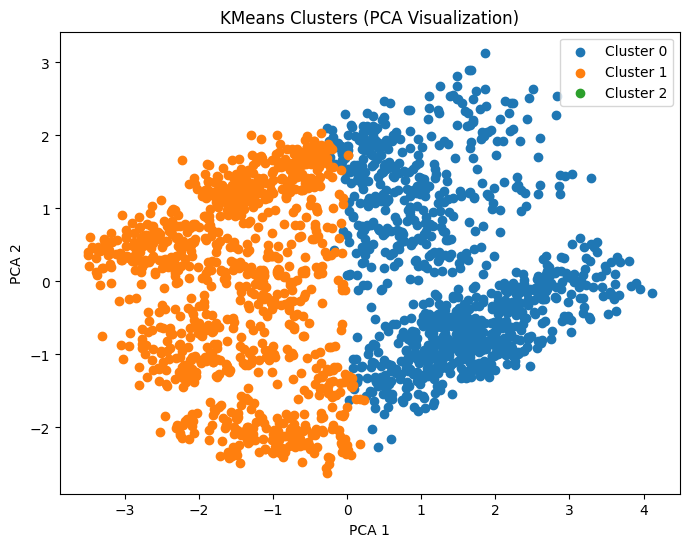

                          ID       Sex  Marital status       Age  Education  \
KMeans_Cluster                                                                
0               1.000007e+08  0.221563        0.387735  0.254946        1.0   
1               1.000013e+08  0.697674        0.607685 -0.260618        1.0   

                  Income  Occupation  Settlement size  
KMeans_Cluster                                         
0               0.600146    1.208704         0.763936  
1              -0.614705    0.403438        -0.780929  
Silhouette Score with PCA: 0.4360476969731742


In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
selected_features = [
    'ID','Sex','Marital status','Age','Education','Income','Occupation','Settlement size'
]
X = df[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = labels

sil_score = silhouette_score(X_scaled, labels)
print("KMeans Silhouette Score:", sil_score)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
for cluster in range(3):
    plt.scatter(X_pca[labels == cluster, 0], X_pca[labels == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('PCA 1'), plt.ylabel('PCA 2')
plt.title('KMeans Clusters (PCA Visualization)')
plt.legend()
plt.show()

print(df.groupby('KMeans_Cluster')[selected_features].mean())

#USING PCA to create stronger features by combining them.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans.fit_predict(X_pca)
sil_score_pca = silhouette_score(X_pca, labels_pca)
print("Silhouette Score with PCA:", sil_score_pca)


Best k: 2


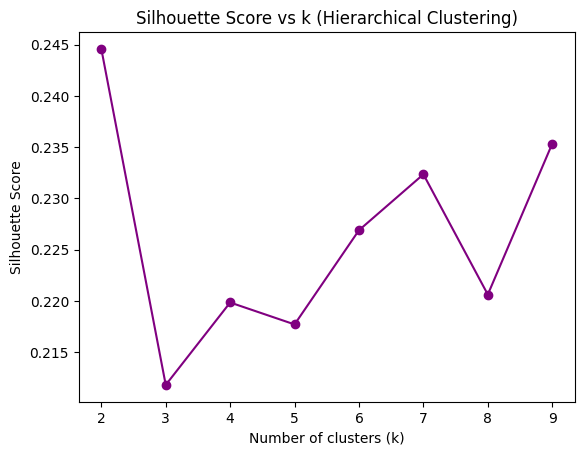

In [72]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

best_k = None
best_score = -1
sil_scores = []
range_n_clusters = range(2, 10)

for k in range_n_clusters:
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    if score > best_score:
        best_score = score
        best_k = k

print("Best k:", best_k)

plt.plot(range_n_clusters, sil_scores, marker='o', color='purple')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k (Hierarchical Clustering)')
plt.show()

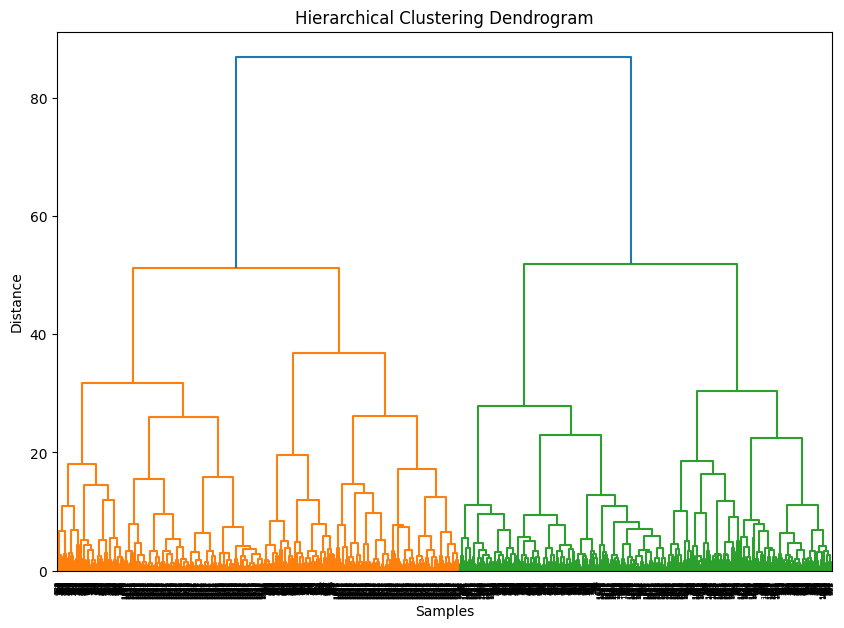

Hierarchical Clustering Silhouette Score: 0.24458159423136508
                                ID       Sex  Marital status       Age  \
Hierarchical_Cluster                                                     
0                     1.000007e+08  0.271116        0.443170  0.227651   
1                     1.000013e+08  0.628242        0.545629 -0.209719   

                      Education    Income  Occupation  Settlement size  
Hierarchical_Cluster                                                    
0                           1.0  0.582241    1.209593         0.917116  
1                           1.0 -0.537527    0.442843        -0.844874  


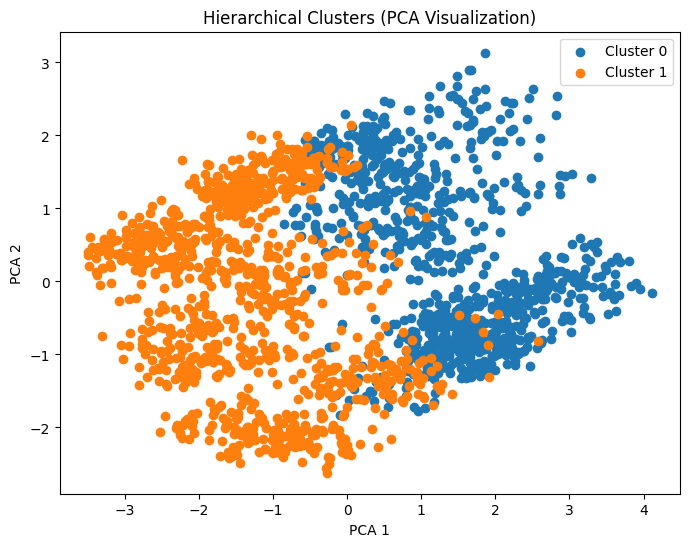

Hierarchical Clustering Silhouette Score with PCA: 0.4148524075362237


In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

n_clusters = 2
agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agg.fit_predict(X_scaled)
df['Hierarchical_Cluster'] = labels

sil_score = silhouette_score(X_scaled, labels)
print("Hierarchical Clustering Silhouette Score:", sil_score)

print(df.groupby('Hierarchical_Cluster')[selected_features].mean())

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
for cluster in range(n_clusters):
    plt.scatter(X_pca[labels == cluster, 0], X_pca[labels == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('PCA 1'), plt.ylabel('PCA 2')
plt.title('Hierarchical Clusters (PCA Visualization)')
plt.legend()
plt.show()


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Hierarchical Clustering
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hier = hier.fit_predict(X_pca)
sil_score_hier_pca = silhouette_score(X_pca, labels_hier)
print("Hierarchical Clustering Silhouette Score with PCA:", sil_score_hier_pca)

Best DBSCAN params:
eps: 1.0999999999999999 min_samples: 4
Best Silhouette Score: 0.24658911969370922
Cluster 0: mean values
ID                 1.000007e+08
Sex                0.000000e+00
Marital status     0.000000e+00
Age                3.137771e-01
Education          1.000000e+00
Income             3.998748e-01
Occupation         1.000000e+00
Settlement size    9.717358e-01
dtype: float64
Cluster 1: mean values
ID                 1.000009e+08
Sex                1.000000e+00
Marital status     1.000000e+00
Age               -3.944953e-01
Education          1.000000e+00
Income             1.768008e-01
Occupation         1.000000e+00
Settlement size    8.728884e-01
dtype: float64
Cluster 2: mean values
ID                 1.000005e+08
Sex                0.000000e+00
Marital status     0.000000e+00
Age                2.818480e-01
Education          1.000000e+00
Income            -9.076233e-01
Occupation         0.000000e+00
Settlement size   -9.802640e-01
dtype: float64
Cluster 3: mean 

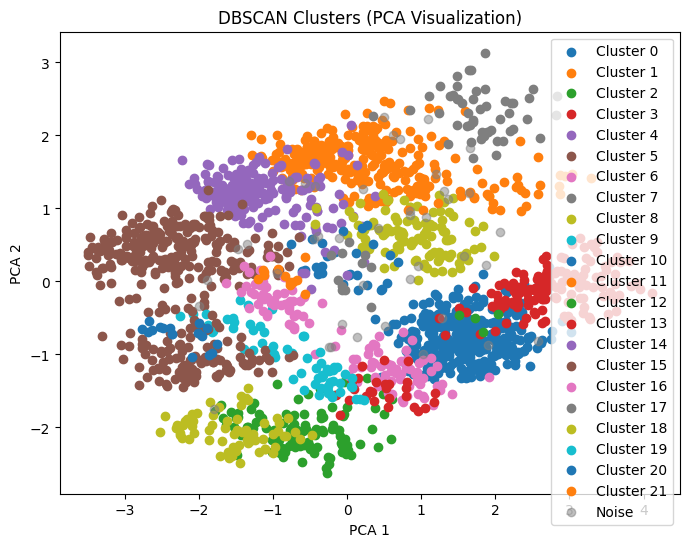

In [74]:
from sklearn.cluster import DBSCAN

eps_values = np.arange(0.5, 2.0, 0.1)
min_samples_values = [3, 4, 5, 6, 7]
best_score = -1
best_params = (None, None)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(X_scaled, labels)
            results.append((eps, min_samples, n_clusters, score))
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print("Best DBSCAN params:")
print("eps:", best_params[0], "min_samples:", best_params[1])
print("Best Silhouette Score:", best_score)

db = DBSCAN(eps=best_params[0], min_samples=best_params[1])
labels = db.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = labels

for cl in set(labels):
    if cl != -1:
        print(f"Cluster {cl}: mean values")
        print(df[df['DBSCAN_Cluster'] == cl][selected_features].mean())

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
for cl in set(labels):
    if cl != -1:
        plt.scatter(X_pca[labels == cl, 0], X_pca[labels == cl, 1], label=f'Cluster {cl}')
plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1], label='Noise', color='grey', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clusters (PCA Visualization)')
plt.legend()
plt.show()

In [78]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("X_scaled", StandardScaler()),          # scales inputs
    ("pca", PCA(n_components=2)),          # optionally, or use full feature set
    ("kmeans",KMeans(n_clusters=2, random_state=42))     # or AgglomerativeClustering, DBSCAN, etc
])

pipeline.fit(X)
joblib.dump(pipeline, "customerpipeline.joblib")

['customerpipeline.joblib']